### sklearn.datasets

In [1]:
from sklearn.datasets import load_boston,load_iris

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.filename

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston.data.shape # X 506个样本，每个样本13个特征

(506, 13)

In [8]:
boston.target.shape  # 506个样本的目标值，房价

(506,)

##### 所谓的boston房价回归分析，就是通过13个房子特征，来预测房价的模型
 - 房价 = W * 房子特征  y=WX

  - -- W就是模型的参数：
    - --- 解方程求W  
    - --- 逼近W的最优解 -> 梯度下降


In [9]:
X = boston.data
y = boston.target

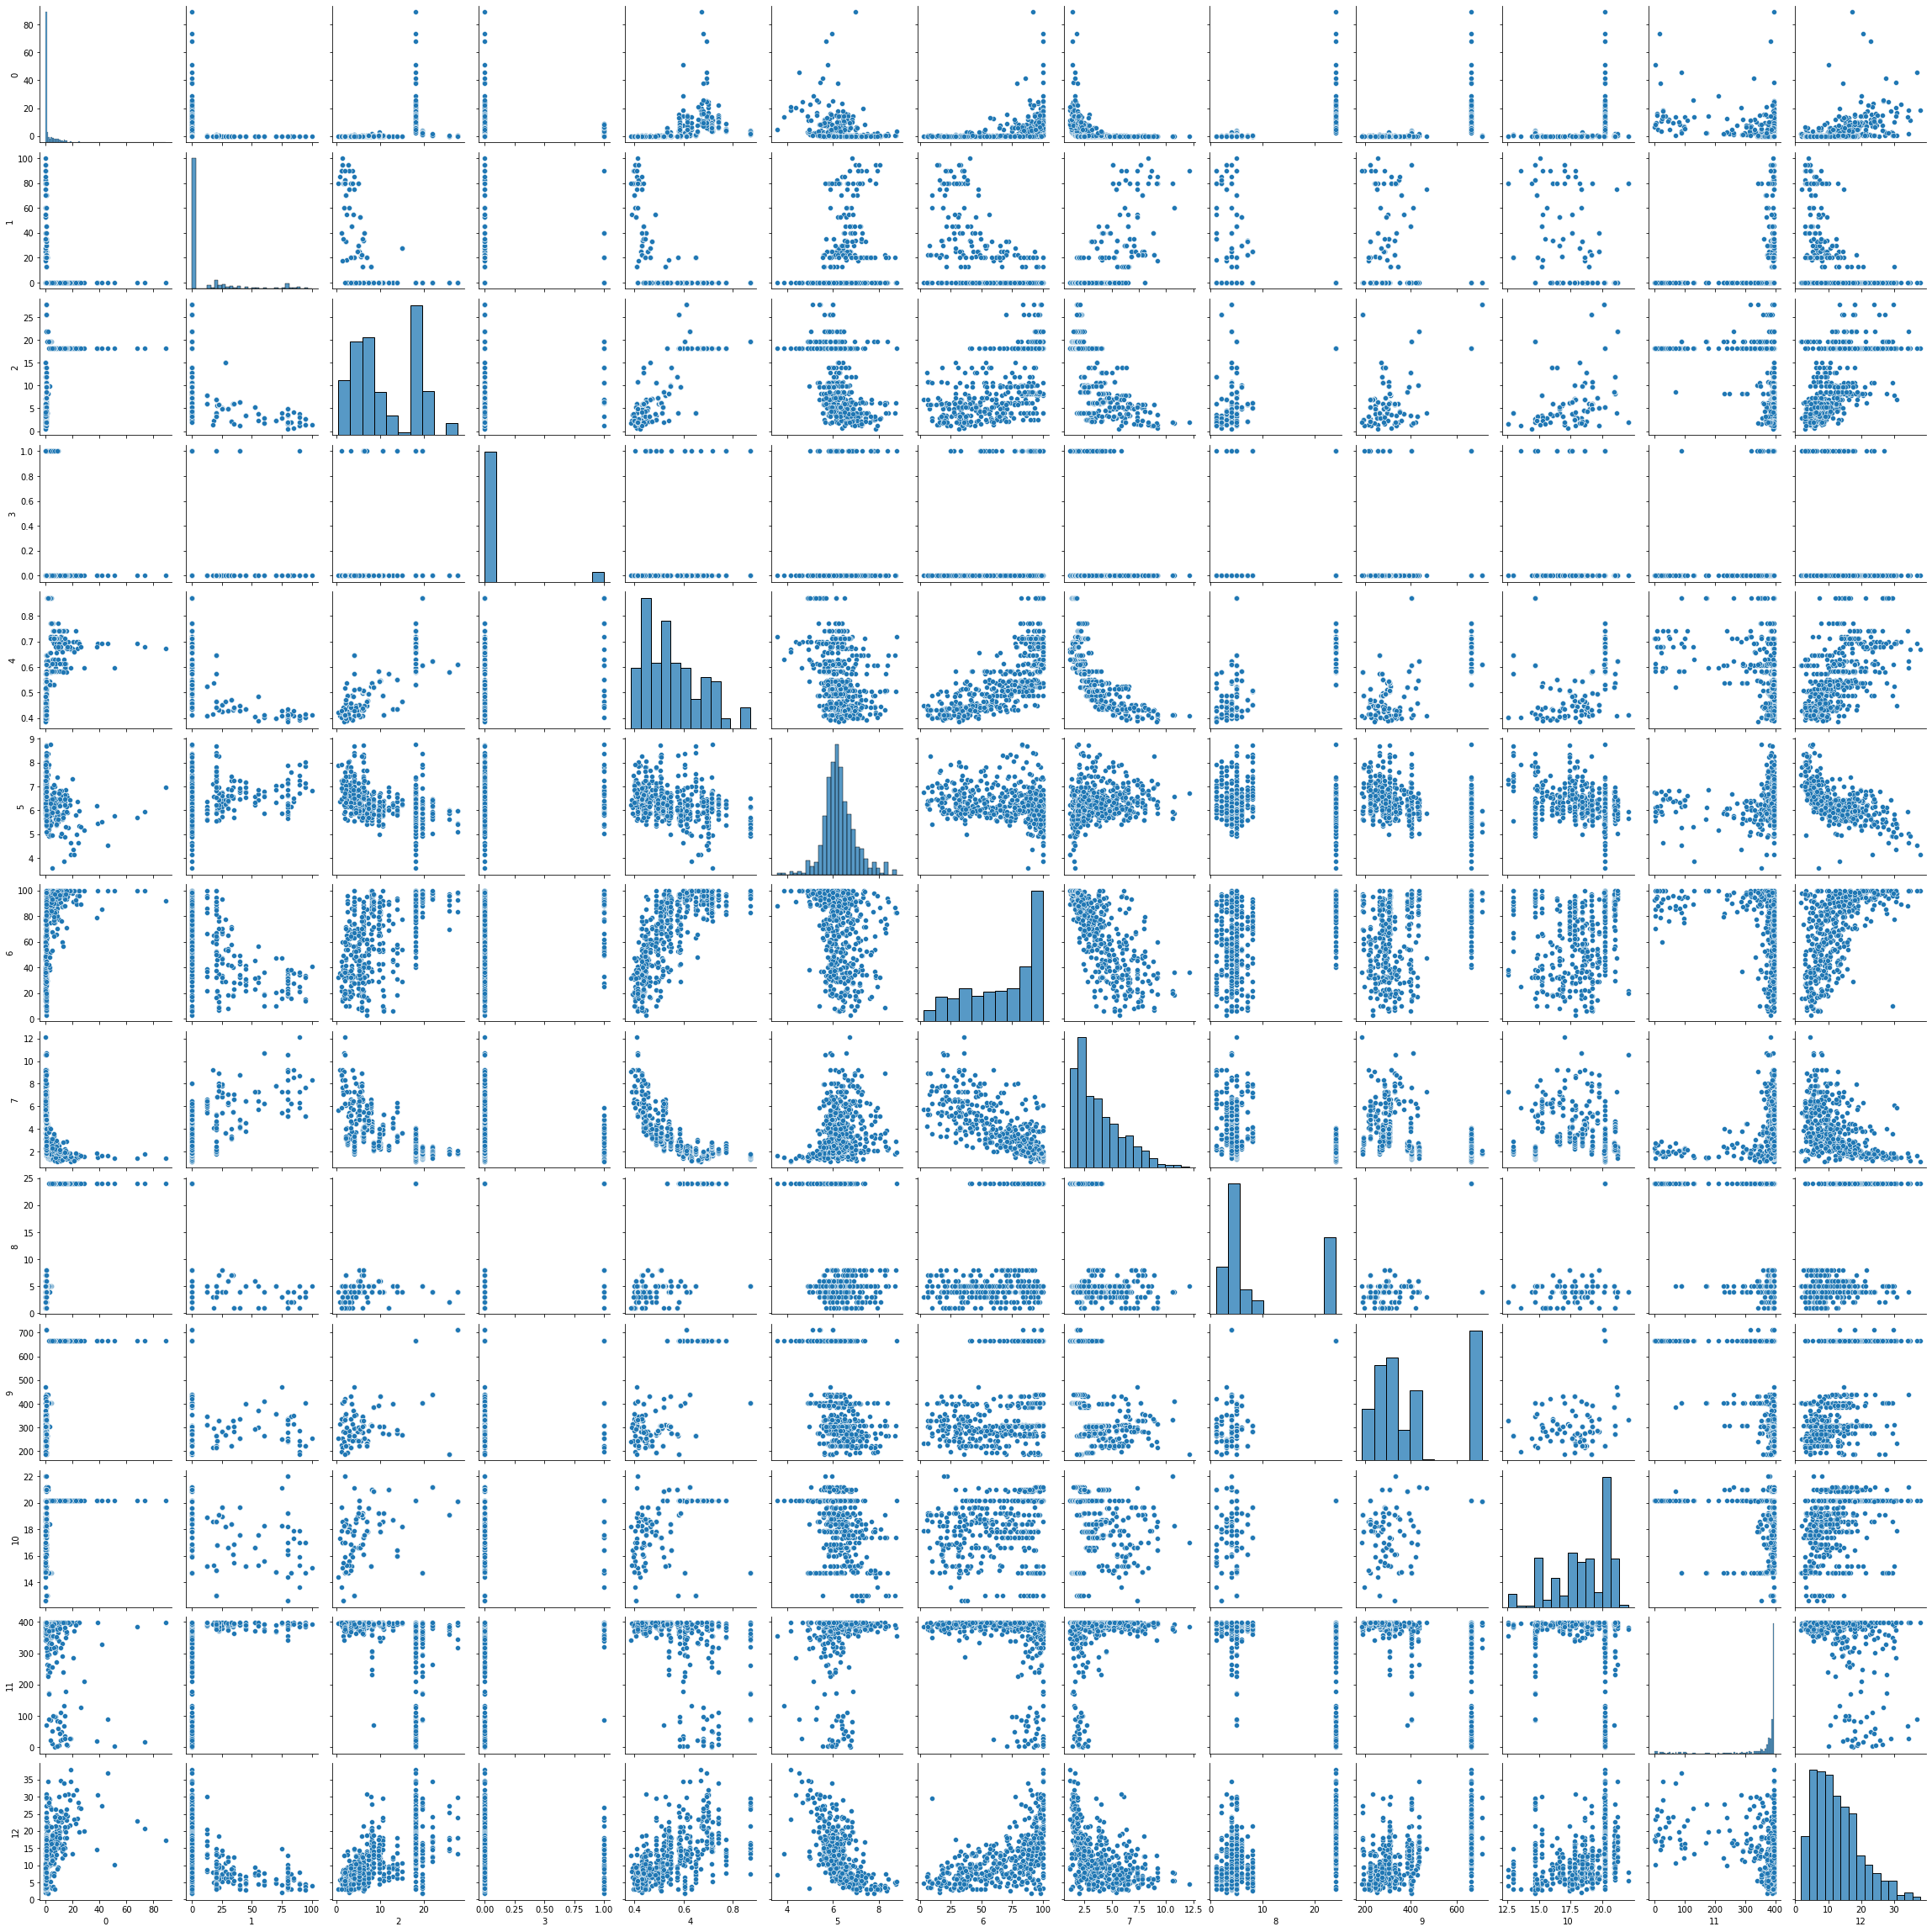

In [10]:
import seaborn as sns
import pandas as pd
sns.pairplot(pd.DataFrame(X))

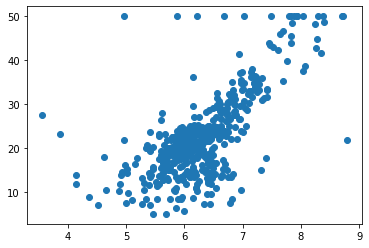

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X[:,5],y)

In [12]:
boston.feature_names[5]

'RM'

In [13]:
from sklearn.decomposition import PCA  # 主成分分析降维评估器
pca1 = PCA(1)  # 构造一个1维降维器

X1d = pca1.fit_transform(X)  # 先学习X的特征，然后将X降到1维

X1d.shape  # 506个1维向量

(506, 1)

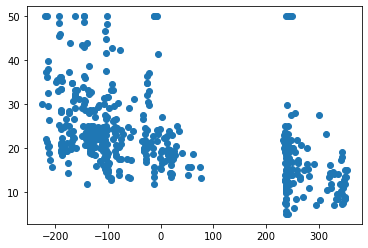

In [14]:
plt.scatter(X1d,y)

#### 划分数据集
- 因为监督学习需要先训练，在测试，在评估
- 训练需要 X_train,y_train: 老师讲课学生学习，既有教材，也有答案
- 测试需要 X_test       : 老师出题，学生答卷，只有考卷，没有答案
- 测试后学生交出答卷得到 y_pred
- 评估需要 y_test, y_pred  : 比较学生的答卷，和参考答案就可以知道学生学会了没有

In [15]:
from sklearn.model_selection import train_test_split  # 数据集划分

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,  # train_size test_size 训练集测试集的占比
                                                random_state=1, # 随机种子，用来保证每次随机过程是固定的，固定的随机分布
                                                )


In [16]:
X_train.shape # 训练集的特征

(404, 13)

In [17]:
X_test.shape # 测试集的特征

(102, 13)

In [18]:
y_train.shape # 训练集的目标

(404,)

In [19]:
y_test.shape  # 测试集的目标

(102,)

#### 选择算法，构造模型

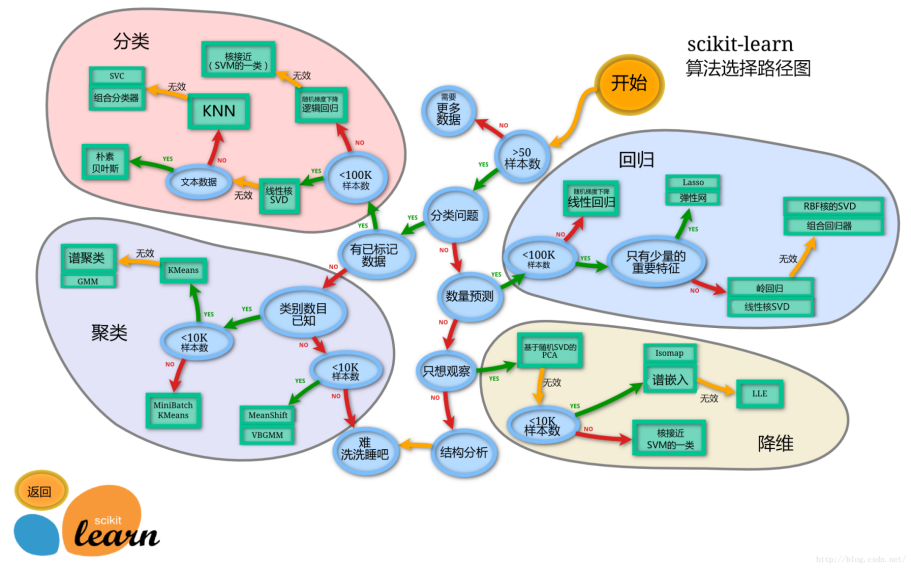

In [20]:
# 波士顿房价预测，是一个回归问题
# sklearn提供了线性回归的模型：LinerRegression,SGDRegressor, Lasso, Ridge, SVR, ....

from sklearn.linear_model import LinearRegression,SGDRegressor
#  LinearRegression --- 解方程求W  
#  SGDRegressor --- 逼近W的最优解 -> 梯度下降

# 通过回归评估器构造模型
lr = LinearRegression()  # 求解析解 超参数较少
sgd = SGDRegressor()  # 随机梯度下降 超参数较多

lr  # 未训练的模型

LinearRegression()

### 模型的训练，学习，拟合

In [21]:
lr.fit(X_train,y_train) # 训练的时候要给题目和答案，特征和目标

LinearRegression()

### 模型的测试: 对测试集进行预测

In [22]:
y_pred = lr.predict(X_test)  # 考试 => 答卷
y_pred.shape

(102,)

In [23]:
y_test.shape

(102,)

### 模型的评估：考试完了，老师要改卷子

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # 回归模型的评估
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score # 分类问题的评估

mse = mean_squared_error(y_test,y_pred)  # 比较答卷和标准答案得到均方误差
r2s = r2_score(y_test,y_pred)
print(f"MSE: {mse}\tR2: {r2s}")

MSE: 23.380836480270315	R2: 0.7634174432138463


In [25]:
# 直接考试，当场给分
lr.score(X_test,y_test)  # 考卷和答案放一起，考完直接出分

0.7634174432138463

#### 用SGD来试试


In [36]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_mms,y,test_size=0.2)
sgd = SGDRegressor(alpha=0.003)
sgd.fit(X_train,y_train) # 训练
sgd.score(X_test,y_test) # 考试，当场给分

0.7882712600768738